## Importer les librairies et les données

In [ ]:
import pandas as pd

In [2]:
data = pd.read_excel("Output(1).xlsx")
data.set_index("Date", inplace=True)
data.head()

,CGL.TO,CPD.TO,ENCC.TO,EQL.TO,FIE.TO,HHL.TO,PFL.TO,PMIF.TO,QQCC.TO,RIT.TO,...,ZFL.TO,ZLB.TO,ZPR.TO,ZQQ.TO,ZRE.TO,ZST.TO,ZUB.TO,ZUT.TO,ZWB.TO,ZWU.TO
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,14.150000,8.043449,2.452003,18.856598,4.044843,4.963745,17.180000,14.740690,6.038743,11.992460,...,17.526623,26.628876,6.209641,64.933243,15.343306,42.623806,16.924496,16.605171,10.252800,8.078306
2020-05-01,14.510000,7.938889,2.577730,19.350182,4.082966,5.054415,17.188719,15.101094,6.150247,11.803721,...,17.538319,27.131310,6.091537,69.033974,15.113293,42.758724,17.444576,16.761806,10.452120,8.255998
2020-06-01,14.900000,8.254747,2.577935,19.459871,4.268143,4.927487,17.222570,15.306134,6.219098,12.200273,...,17.909897,26.822790,6.357975,73.301895,15.714849,42.927792,17.426947,16.912373,10.839819,8.022749
2020-07-01,16.469999,8.799711,2.669691,20.117811,4.393393,5.114021,17.255615,15.489331,6.269777,12.389585,...,18.222260,28.252050,6.858636,78.523705,15.946326,43.029369,17.794304,18.222904,10.995815,8.272116
2020-08-01,16.370001,9.226049,2.804050,20.522190,4.676573,5.253158,17.271280,15.642772,6.484623,12.356784,...,17.517939,28.545233,7.198208,87.020187,15.874821,43.063213,18.443148,17.948025,12.025650,8.278810


#### Visualisation des données brutes

<Axes: title={'center': 'Stock Prices'}, xlabel='Date'>

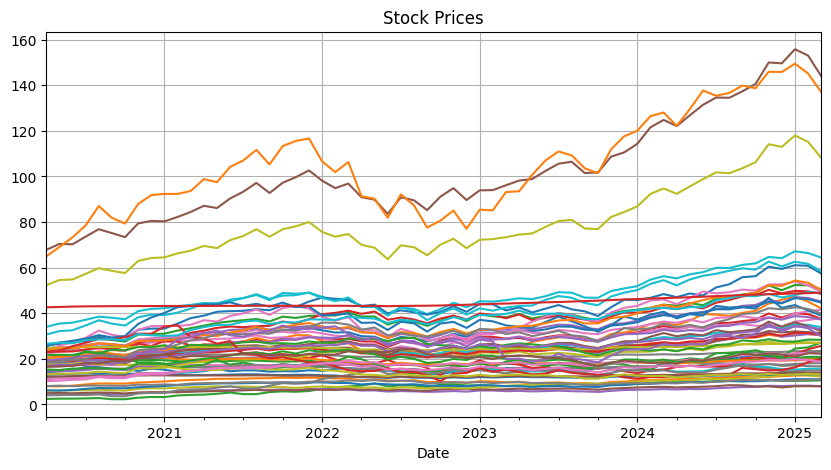

In [3]:
data.plot(figsize=(10, 5), title="Stock Prices", grid=True,legend=False)

In [ ]:
#Calcul des rendements
rdt = (data/data.shift(1) - 1)
rdt.dropna().head()

,CGL.TO,CPD.TO,ENCC.TO,EQL.TO,FIE.TO,HHL.TO,PFL.TO,PMIF.TO,QQCC.TO,RIT.TO,...,ZFL.TO,ZLB.TO,ZPR.TO,ZQQ.TO,ZRE.TO,ZST.TO,ZUB.TO,ZUT.TO,ZWB.TO,ZWU.TO
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-01,0.025442,-0.013000,0.051275,0.026176,0.009425,0.018266,0.000507,0.024450,0.018465,-0.015738,...,0.000667,0.018868,-0.019019,0.063153,-0.014991,0.003165,0.030729,0.009433,0.019441,0.021996
2020-06-01,0.026878,0.039786,0.000080,0.005669,0.045354,-0.025112,0.001969,0.013578,0.011195,0.033595,...,0.021187,-0.011371,0.043739,0.061823,0.039803,0.003954,-0.001011,0.008983,0.037093,-0.028252
2020-07-01,0.105369,0.066018,0.035593,0.033810,0.029345,0.037856,0.001919,0.011969,0.008149,0.015517,...,0.017441,0.053285,0.078745,0.071237,0.014730,0.002366,0.021080,0.077490,0.014391,0.031082
2020-08-01,-0.006072,0.048449,0.050328,0.020101,0.064456,0.027207,0.000908,0.009906,0.034267,-0.002647,...,-0.038652,0.010377,0.049510,0.108203,-0.004484,0.000787,0.036464,-0.015084,0.093657,0.000809
2020-09-01,-0.042761,-0.004213,-0.175566,-0.013435,-0.024067,-0.017087,0.000403,0.001384,-0.035766,-0.000841,...,0.011964,0.003424,-0.006063,-0.059442,-0.011216,0.001182,-0.045783,0.061699,-0.041412,-0.004380


#### Visualisation des rendements brutes 

<Axes: title={'center': 'Daily Returns'}, xlabel='Date'>

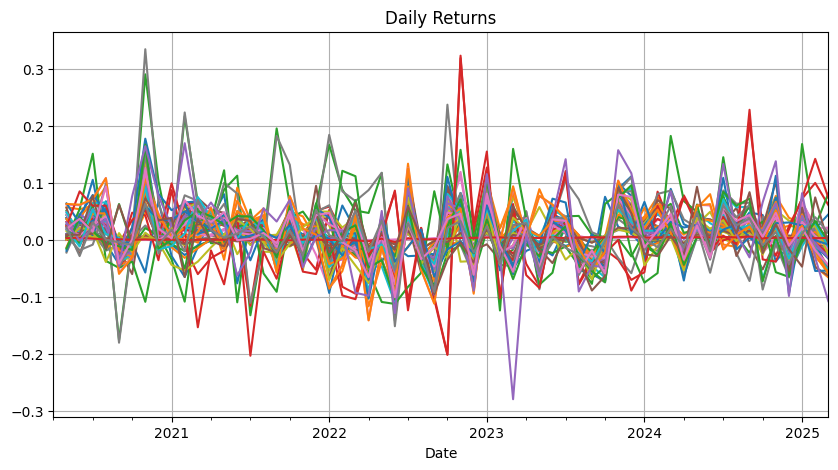

In [5]:
rdt.plot(figsize=(10, 5), title="Daily Returns", grid=True,legend=False)

## 1er filtre :
- Calcul des indicateurs pertinents

In [39]:
rdtmoyen = rdt.mean()
rdtgéométrique = (rdt + 1).prod()**(1/len(rdt)) - 1
rdtstd = rdt.std()
rdt_etendue = rdt.max() - rdt.min()
Sharpe = rdtmoyen / rdtstd
losses_std = rdt[rdt < 0].std()
losses_max = rdt[rdt < 0].min()
losses = rdt[rdt < 0].count()
losses_ratio = losses / len(rdt)

In [42]:
df = pd.DataFrame([rdtmoyen,rdtgéométrique,rdtstd,rdt_etendue,Sharpe,losses,losses_std,losses_max,losses_ratio],
                   index=["Mean","Geometric Mean","Standard Deviation","Range","Sharpe Ratio","Losses","Losses Standard Deviation",
                          "Maximum Loss","Losses Ratio"], columns=data.columns)
df

,CGL.TO,CPD.TO,ENCC.TO,EQL.TO,FIE.TO,HHL.TO,PFL.TO,PMIF.TO,QQCC.TO,RIT.TO,...,ZFL.TO,ZLB.TO,ZPR.TO,ZQQ.TO,ZRE.TO,ZST.TO,ZUB.TO,ZUT.TO,ZWB.TO,ZWU.TO
Mean,0.009533,0.008259,0.027992,0.012568,0.012455,0.008761,0.002134,0.003585,0.012785,0.005750,...,-0.004227,0.010772,0.010258,0.014477,0.006516,0.002377,0.013186,0.005987,0.011177,0.005796
Geometric Mean,0.008526,0.007655,0.024659,0.011605,0.011495,0.007881,0.002096,0.003423,0.011748,0.004532,...,-0.004834,0.010136,0.009568,0.012517,0.005140,0.002335,0.009499,0.004972,0.010058,0.005181
Standard Deviation,0.042179,0.031117,0.078503,0.039683,0.039728,0.039144,0.002037,0.014514,0.041573,0.048271,...,0.037442,0.030909,0.032906,0.059466,0.051598,0.002172,0.083414,0.043656,0.044042,0.032694
Range,0.181463,0.166902,0.465727,0.193257,0.209367,0.154660,0.008104,0.073162,0.226798,0.222484,...,0.160950,0.144368,0.169778,0.266321,0.271217,0.009635,0.448556,0.187739,0.218943,0.161485
Sharpe Ratio,0.226024,0.265401,0.356575,0.316721,0.313516,0.223820,1.047605,0.246975,0.307534,0.119116,...,-0.112896,0.348503,0.311730,0.243451,0.126293,1.094431,0.158079,0.137135,0.253788,0.177290
Losses,28.000000,22.000000,17.000000,22.000000,21.000000,24.000000,10.000000,21.000000,19.000000,24.000000,...,33.000000,23.000000,21.000000,22.000000,29.000000,8.000000,23.000000,29.000000,23.000000,24.000000
Losses Standard Deviation,0.019748,0.021446,0.052546,0.021941,0.020876,0.018428,0.000482,0.009134,0.018956,0.027654,...,0.020353,0.015141,0.019962,0.037954,0.028089,0.001320,0.058431,0.023397,0.025132,0.020960
Maximum Loss,-0.076094,-0.075460,-0.175566,-0.085565,-0.080259,-0.059824,-0.001214,-0.036356,-0.090608,-0.110025,...,-0.075080,-0.051124,-0.069629,-0.140943,-0.104361,-0.003686,-0.279046,-0.094576,-0.100515,-0.091215
Losses Ratio,0.466667,0.366667,0.283333,0.366667,0.350000,0.400000,0.166667,0.350000,0.316667,0.400000,...,0.550000,0.383333,0.350000,0.366667,0.483333,0.133333,0.383333,0.483333,0.383333,0.400000


In [7]:
Ascending = rdtmoyen.sort_values(ascending=False)
Ascending

ENCC.TO    0.027992
XEG.TO     0.027242
TEC.TO     0.015979
ZQQ.TO     0.014477
ZEB.TO     0.014377
XFN.TO     0.014296
XQQ.TO     0.013859
VFV.TO     0.013540
XUS.TO     0.013506
VDY.TO     0.013415
XDIV.TO    0.013247
ZUB.TO     0.013186
VUN.TO     0.013132
XEI.TO     0.012856
QQCC.TO    0.012785
EQL.TO     0.012568
FIE.TO     0.012455
ZDV.TO     0.012410
XMC.TO     0.012275
VCN.TO     0.012107
XSP.TO     0.012076
XIU.TO     0.011757
ZCN.TO     0.011695
VEQT.TO    0.011547
XDV.TO     0.011546
XAW.TO     0.011519
VXC.TO     0.011460
XEQT.TO    0.011383
ZWB.TO     0.011177
ZLB.TO     0.010772
ZPR.TO     0.010258
XEF.TO     0.009991
VIU.TO     0.009784
CGL.TO     0.009533
XSU.TO     0.009208
XGRO.TO    0.009172
XGD.TO     0.009131
HHL.TO     0.008761
CPD.TO     0.008259
XBAL.TO    0.007025
ZRE.TO     0.006516
ZUT.TO     0.005987
ZWU.TO     0.005796
RIT.TO     0.005750
XUT.TO     0.005269
XCH.TO     0.004827
XRE.TO     0.004815
PMIF.TO    0.003585
ZST.TO     0.002377
ZCS.TO     0.002369


In [8]:
Top_10 = pd.DataFrame(Ascending.head(10))
Top_10

,0
ENCC.TO,0.027992
XEG.TO,0.027242
TEC.TO,0.015979
ZQQ.TO,0.014477
ZEB.TO,0.014377
XFN.TO,0.014296
XQQ.TO,0.013859
VFV.TO,0.013540
XUS.TO,0.013506
VDY.TO,0.013415


In [9]:
Top_10_list = Top_10.index.tolist()
Top_10_list

['ENCC.TO',
 'XEG.TO',
 'TEC.TO',
 'ZQQ.TO',
 'ZEB.TO',
 'XFN.TO',
 'XQQ.TO',
 'VFV.TO',
 'XUS.TO',
 'VDY.TO']

In [19]:
Data_Top_10 = data[Top_10_list]
Data_Top_10.head()

,ENCC.TO,XEG.TO,TEC.TO,ZQQ.TO,ZEB.TO,XFN.TO,XQQ.TO,VFV.TO,XUS.TO,VDY.TO
Date,,,,,,,,,,
2020-04-01,2.452003,4.265112,18.075804,64.933243,18.461784,26.429472,24.228277,67.784805,23.744122,23.163788
2020-05-01,2.577730,4.290806,19.113508,69.033974,18.838764,26.542755,25.728092,70.394470,24.619701,23.335997
2020-06-01,2.577935,4.213727,20.141329,73.301895,19.551996,27.512518,27.292522,70.253151,24.520845,23.543602
2020-07-01,2.669691,4.178923,21.348179,78.523705,19.839352,27.721636,29.252420,73.613632,25.671621,23.812643
2020-08-01,2.804050,4.421179,23.346472,87.020187,21.799038,29.602329,32.427361,76.850410,26.862011,25.100689


<Axes: title={'center': 'Top 10 Stocks'}, xlabel='Date'>

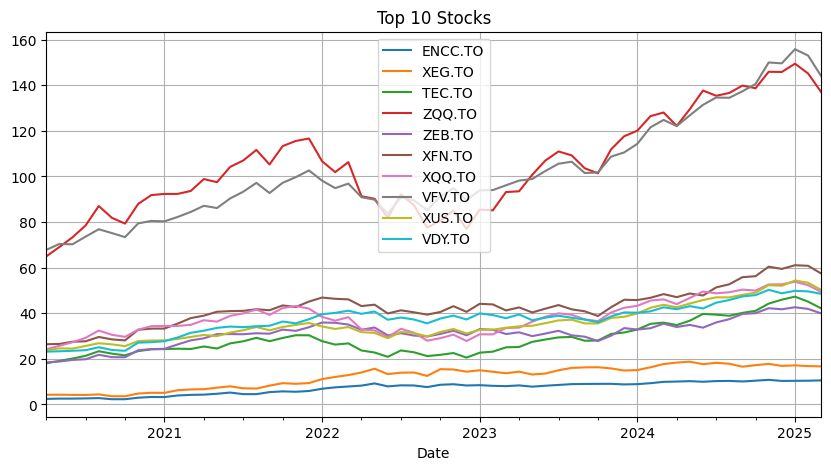

In [11]:
Data_Top_10.plot(figsize=(10, 5), title="Top 10 Stocks", grid=True)

In [20]:
rdt_Top_10 = rdt[Top_10_list]
rdt_Top_10.head()

,ENCC.TO,XEG.TO,TEC.TO,ZQQ.TO,ZEB.TO,XFN.TO,XQQ.TO,VFV.TO,XUS.TO,VDY.TO
Date,,,,,,,,,,
2020-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-01,0.051275,0.006024,0.057408,0.063153,0.020419,0.004286,0.061903,0.038499,0.036876,0.007434
2020-06-01,0.000080,-0.017964,0.053775,0.061823,0.037860,0.036536,0.060806,-0.002008,-0.004015,0.008896
2020-07-01,0.035593,-0.008260,0.059919,0.071237,0.014697,0.007601,0.071811,0.047834,0.046931,0.011427
2020-08-01,0.050328,0.057971,0.093605,0.108203,0.098778,0.067842,0.108536,0.043970,0.046370,0.054091


In [13]:
rdt_Top_10_moyen = rdt_Top_10.mean()
rdt_Top_10_moyen

ENCC.TO    0.027992
XEG.TO     0.027242
TEC.TO     0.015979
ZQQ.TO     0.014477
ZEB.TO     0.014377
XFN.TO     0.014296
XQQ.TO     0.013859
VFV.TO     0.013540
XUS.TO     0.013506
VDY.TO     0.013415
dtype: float64

In [14]:
Covar = rdt_Top_10.cov()
Covar

,ENCC.TO,XEG.TO,TEC.TO,ZQQ.TO,ZEB.TO,XFN.TO,XQQ.TO,VFV.TO,XUS.TO,VDY.TO
ENCC.TO,0.006163,0.006783,0.000428,0.000880,0.002075,0.001888,0.000837,0.000784,0.000801,0.002197
XEG.TO,0.006783,0.008227,0.000293,0.000744,0.002220,0.002038,0.000714,0.000908,0.000923,0.002482
TEC.TO,0.000428,0.000293,0.003129,0.003179,0.001157,0.001244,0.003170,0.001870,0.001920,0.000861
ZQQ.TO,0.000880,0.000744,0.003179,0.003536,0.001579,0.001594,0.003513,0.001967,0.002019,0.001218
ZEB.TO,0.002075,0.002220,0.001157,0.001579,0.002502,0.002275,0.001545,0.001086,0.001114,0.001885
XFN.TO,0.001888,0.002038,0.001244,0.001594,0.002275,0.002201,0.001556,0.001161,0.001192,0.001800
XQQ.TO,0.000837,0.000714,0.003170,0.003513,0.001545,0.001556,0.003514,0.001946,0.002000,0.001181
VFV.TO,0.000784,0.000908,0.001870,0.001967,0.001086,0.001161,0.001946,0.001407,0.001436,0.000938
XUS.TO,0.000801,0.000923,0.001920,0.002019,0.001114,0.001192,0.002000,0.001436,0.001476,0.000965
VDY.TO,0.002197,0.002482,0.000861,0.001218,0.001885,0.001800,0.001181,0.000938,0.000965,0.001657


<Axes: >

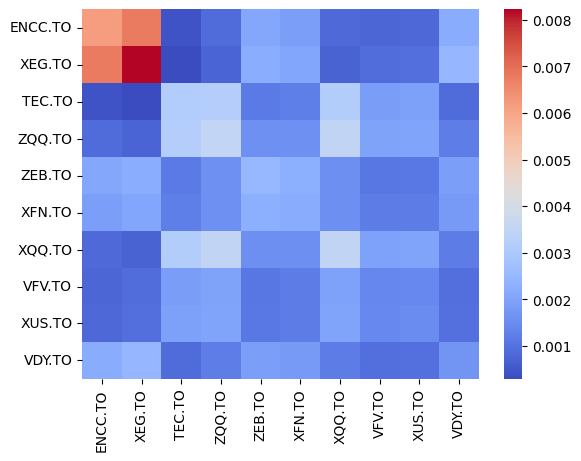

In [15]:
import seaborn as sns
sns.heatmap(Covar, annot=False, cmap='coolwarm')

In [16]:
Corr = rdt_Top_10.corr()
Corr

,ENCC.TO,XEG.TO,TEC.TO,ZQQ.TO,ZEB.TO,XFN.TO,XQQ.TO,VFV.TO,XUS.TO,VDY.TO
ENCC.TO,1.000000,0.952552,0.097365,0.188541,0.528361,0.512474,0.179829,0.266290,0.265513,0.687439
XEG.TO,0.952552,1.000000,0.057765,0.137920,0.489266,0.478878,0.132774,0.266749,0.265011,0.672201
TEC.TO,0.097365,0.057765,1.000000,0.955807,0.413597,0.474147,0.956000,0.891139,0.893555,0.377938
ZQQ.TO,0.188541,0.137920,0.955807,1.000000,0.530963,0.571245,0.996697,0.882092,0.883692,0.503191
ZEB.TO,0.528361,0.489266,0.413597,0.530963,1.000000,0.969362,0.521089,0.578981,0.579569,0.925542
XFN.TO,0.512474,0.478878,0.474147,0.571245,0.969362,1.000000,0.559389,0.659820,0.661235,0.942493
XQQ.TO,0.179829,0.132774,0.956000,0.996697,0.521089,0.559389,1.000000,0.875326,0.878235,0.489389
VFV.TO,0.266290,0.266749,0.891139,0.882092,0.578981,0.659820,0.875326,1.000000,0.996751,0.614001
XUS.TO,0.265513,0.265011,0.893555,0.883692,0.579569,0.661235,0.878235,0.996751,1.000000,0.616751
VDY.TO,0.687439,0.672201,0.377938,0.503191,0.925542,0.942493,0.489389,0.614001,0.616751,1.000000


<Axes: >

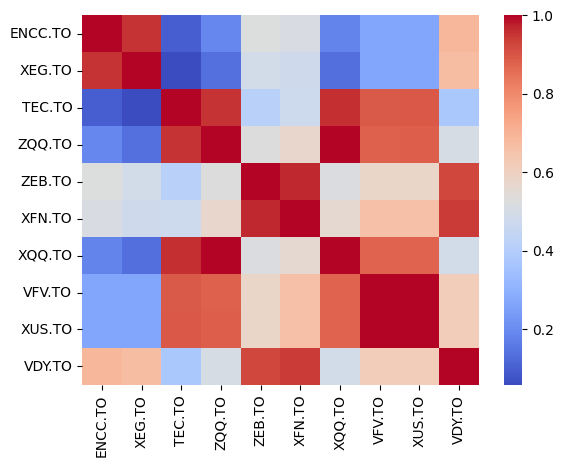

In [17]:
sns.heatmap(Corr, annot=False, cmap='coolwarm')